In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve,auc,roc_auc_score

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# working directory
os.chdir("D:/data/Churn prediction")

In [4]:
#Loading feature file Dataset
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')


In [5]:
train.shape

(3333, 21)

In [6]:
train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


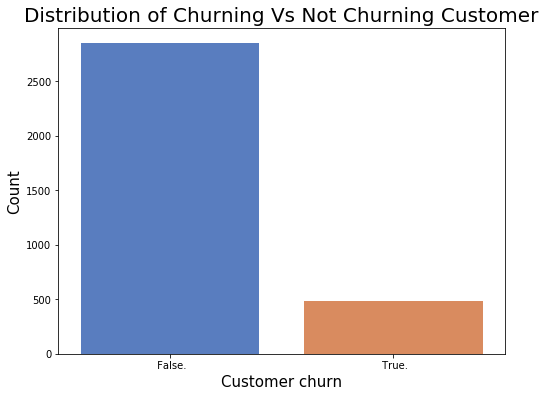

In [7]:
#Target Variable data distribution
plt.figure(figsize=(8,6))
sns.countplot(x = train.Churn,palette='muted')
plt.xlabel('Customer churn', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Churning Vs Not Churning Customer",fontsize= 20)
plt.show()

In [8]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(30,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    #plt.savefig("{X}_Vs_{Y}.png".format(X=x,Y=y))
    plt.show()

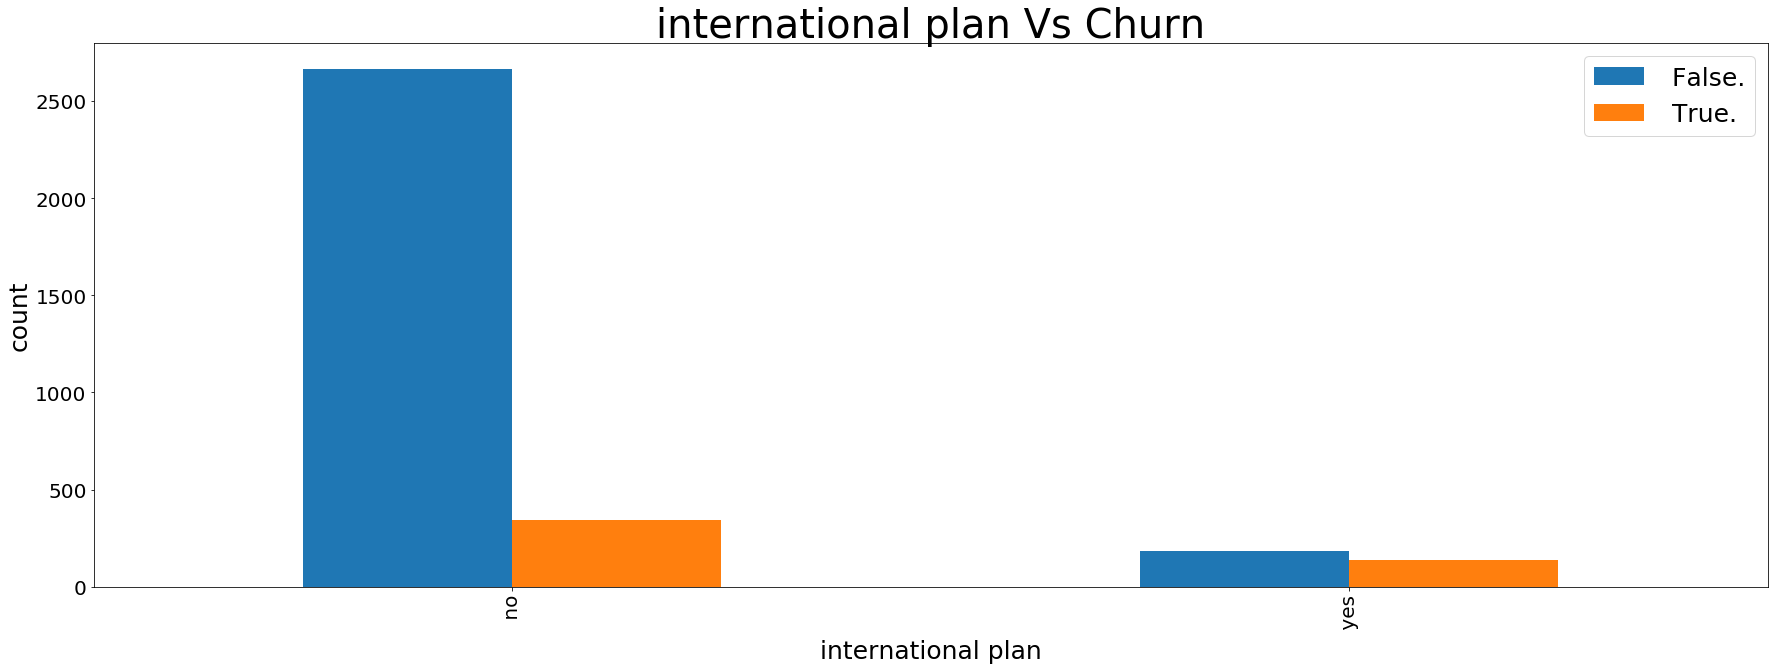

In [11]:
#International_Plan Wise Churning of customer
diff_bar('international plan','Churn')

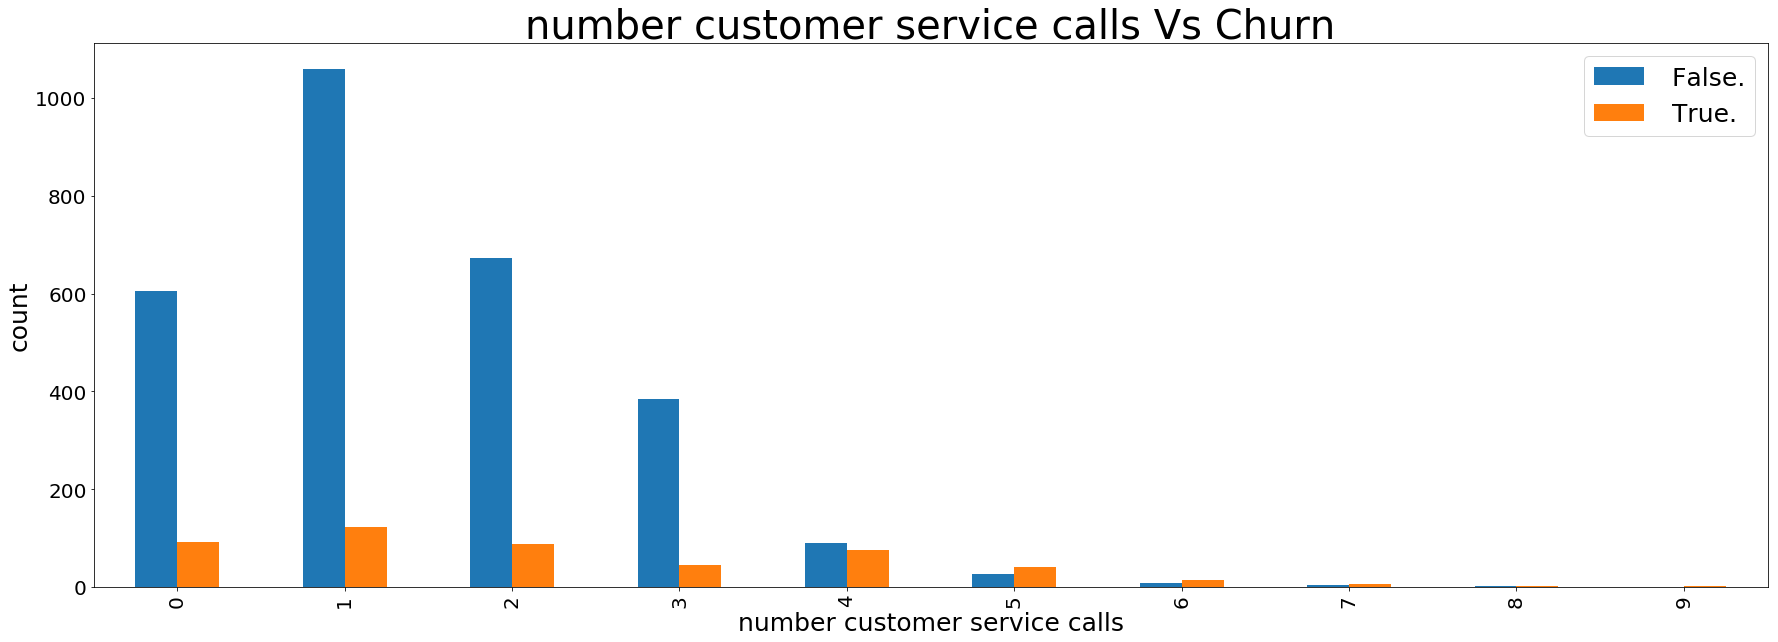

In [13]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('number customer service calls','Churn')

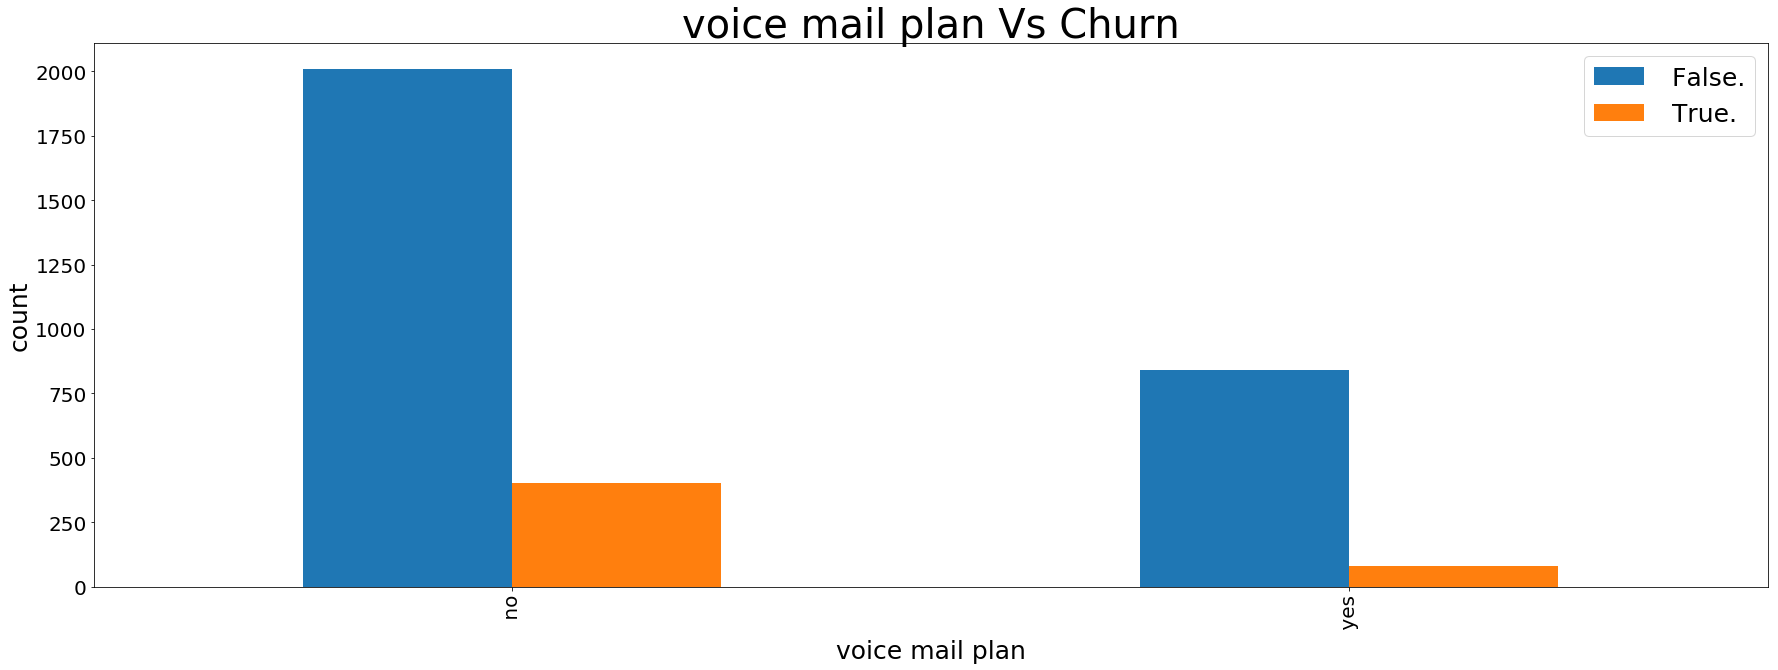

In [14]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice mail plan','Churn')

In [6]:
def preprocessing(train):
    
    #replace - with nospace
    train['phone number']=train['phone number'].str.replace('-','')
    #converting phone number into int
    train['phone number']=train['phone number'].astype(int)
    
    # converting Type string to numeric
    from sklearn import preprocessing
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(train['state']) 
    label_encoder.classes_
    train['state']=label_encoder.transform(train['state'])
    
    
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(train['international plan']) 
    label_encoder.classes_
    train['international plan']=label_encoder.transform(train['international plan'])
    
    
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(train['voice mail plan']) 
    label_encoder.classes_
    train['voice mail plan']=label_encoder.transform(train['voice mail plan'])
    
    #converting churn variable into numeric
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(train['Churn']) 
    label_encoder.classes_
    train['Churn']=label_encoder.transform(train['Churn'])
    
    return train 

In [7]:
train=preprocessing(train)
test=preprocessing(test)

In [8]:
from collections import Counter
c=Counter(train['Churn'])
print(c.items())

dict_items([(0, 2850), (1, 483)])


# ! conda install imblearn

In [9]:
import imblearn
from imblearn.over_sampling import SMOTE

In [10]:
y_train=train['Churn']
X_train=train.drop(labels=['Churn'],axis=1)

In [11]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [12]:
from collections import Counter
c=Counter(y_train)
print(c.items())

dict_items([(0, 2850), (1, 2850)])


In [13]:
y_test=test['Churn']
X_test=test.drop(labels=['Churn'],axis=1)

In [14]:
X_test.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
0,11,101,510,3548815,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,26,137,510,3817211,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,35,103,408,4119481,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,32,99,415,4189100,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,40,108,415,4133643,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [15]:
clf = LogisticRegression().fit(X_train, y_train)

In [16]:
prediction=clf.predict(X_test)

In [17]:
accuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.7018596280743852

In [18]:
clf = LogisticRegression(penalty='l1',C=1.5).fit(X_train, y_train)

In [19]:
prediction=clf.predict(X_test)

In [20]:
zaccuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.7684463107378524

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
prediction=clf.predict(X_test)

In [21]:
accuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.8608278344331134

In [22]:
parameters={'n_estimators':[4,6,9],
            'max_features': ['log2','sqrt','auto'],
            'criterion':['entropy','gini'],
            'max_depth':[2,3,5,10]
            
                             }

In [26]:
#this grid search is used for random forest

from sklearn.metrics import make_scorer,accuracy_score

acc_scorer=make_scorer(accuracy_score)
grid_obj=GridSearchCV(clf,parameters,scoring=acc_scorer)
grid_obj=grid_obj.fit(X_train,y_train)

In [28]:
classifier=grid_obj.best_estimator_
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
new_pred=classifier.predict(X_test)
print(accuracy_score(y_test,new_pred))

0.9190161967606478


In [25]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
#prediction=clf.predict(X_test)

In [27]:
#accuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.8422315536892622

In [30]:
svc = SVC(random_state=0, tol=1e-5)
svc.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

In [31]:
prediction=clf.predict(X_test)

In [32]:
accuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.8608278344331134